# Dataset Information

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation. 
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.	
5. InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal, the name of the country where each customer resides. 

# Import Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check Dataset

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# How many unique values on each column
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [5]:
# Cheack how many missing values on each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data Cleaning
1. Handling missing data
2. Fixing dtypes
3. Drop duplicates

In [6]:
# Check the StockCode that have missing Description
miss_description = df[df['Description'].isnull()]
stockcode_with_miss_description = miss_description['StockCode'].unique()

# Check all the StockCode that don't have missing Description
non_null_description = df[df['StockCode'].isin(stockcode_with_miss_description) & df['Description'].notnull()]

# Create a dictionary mapping StockCode to Description from non_null_description
description_mapping = non_null_description.groupby('StockCode')['Description'].first().to_dict()

# Fill missing Description based on StockCode
def fill_missing_desc(row):
    if pd.isnull(row['Description']) and row['StockCode'] in description_mapping:
        return description_mapping[row['StockCode']]
    else:
        return row['Description']

df['Description'] = df.apply(fill_missing_desc, axis=1)

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Check the UnitPrice that have missing Description
miss_description = df[df['Description'].isnull()]
unitprice_with_miss_description = miss_description['UnitPrice'].unique()

# Check all the UnitPrice that don't have missing Description
non_null_description = df[df['UnitPrice'].isin(unitprice_with_miss_description) & df['Description'].notnull()]

# Create a dictionary mapping UnitPrice to Description from non_null_description
description_mapping = non_null_description.groupby('UnitPrice')['Description'].first().to_dict()

# Fill missing Description based on UnitPrice
def fill_missing_desc(row):
    if pd.isnull(row['Description']) and row['UnitPrice'] in description_mapping:
        return description_mapping[row['UnitPrice']]
    else:
        return row['Description']

df['Description'] = df.apply(fill_missing_desc, axis=1)

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Reduced missing descriptions from 1454 to 0 by replacing with corresponding values from StockCode and UnitPrice. The missing CustomerID values are not crucial and will remain as they are, as they are mostly unique and difficult to replace due to their lack of pattern.

In [8]:
# Change InvoiceDate dtype from object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create another 2 columns for the year and month of the invoices date
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   541909 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   InvoiceMonth  541909 non-null  int32         
 9   InvoiceYear   541909 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(4)
memory usage: 37.2+ MB


In [9]:
# Drop duplicated invoices
df = df.drop_duplicates()

df.reset_index(inplace=True, drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
...,...,...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011


# Data Analysis
## Descriptive Statistic

In [10]:
# Describe the dataset statistically
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,InvoiceYear
count,536641.000000,536641,536641.000000,401604.000000,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818,7.544820,2010.921771
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,1.000000,2010.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000,5.000000,2011.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000,8.000000,2011.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000,11.000000,2011.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,12.000000,2011.000000
std,219.130156,NaN,97.233118,1714.006089,3.508696,0.268532


It doesn't quite feel right for UnitPrice to have negative values, especially the UnitPrice is in sterling as in Pound Sterling (£). As for the quantity is the value for the canceled invoices. Cancelled invoices typically have negative values in the quantity column to differentiate them from regular transactions. These negative quantities indicate the removal or return of items that were previously sold or purchased. Rather than removing the entire transaction from the database, the original transaction is typically retained but flagged as canceled, making it easier for record-keeping and maintaining the transaction history.

In [11]:
# Check the negative value
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear
297646,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,8,2011
297647,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,8,2011


Because there's only 1 negative value, it could be the minus (-) is a mistake. So let's just replace the negative value by multipying it with negative one (-1)

In [12]:
# Replace UnitPrice < 0 by multiply it with -1
df.loc[df['UnitPrice'] < 0, 'UnitPrice'] = df.loc[df['UnitPrice'] < 0, 'UnitPrice'] * -1

# Check again for the negative value
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear


In [13]:
# Describe the dataset again statistically
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,InvoiceYear
count,536641.000000,536641,536641.000000,401604.000000,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.715110,15281.160818,7.544820,2010.921771
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,1.000000,2010.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000,5.000000,2011.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000,8.000000,2011.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000,11.000000,2011.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,12.000000,2011.000000
std,219.130156,NaN,97.229154,1714.006089,3.508696,0.268532


In [14]:
# Mode of the dataset
df.mode()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear
0,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-10-31 14:41:00,1.25,17841.0,United Kingdom,11,2011


## Canceled and Non-Canceled Invoices

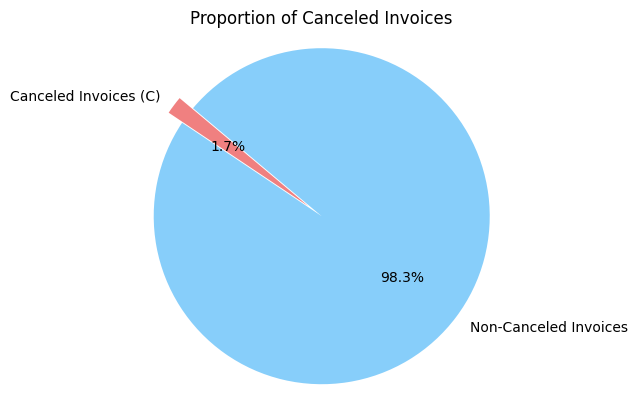

In [15]:
# Count the occurrences of 'InvoiceNo' starting with 'C'
canceled_invoices = df[df['InvoiceNo'].str.startswith('C')]['InvoiceNo'].count()

# Count the occurrences of 'InvoiceNo' NOT starting with 'C'
non_canceled_invoices = df[~df['InvoiceNo'].str.startswith('C')]['InvoiceNo'].count()

# Create a pie chart
labels = ['Canceled Invoices (C)', 'Non-Canceled Invoices']
sizes = [canceled_invoices, non_canceled_invoices]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (canceled invoices)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Canceled Invoices')

plt.show()

In [16]:
# Check the number of the canceled and non-canceled invoices
print('Total of Canceled Invoices: ', canceled_invoices)
print('Total of Non-Canceled Invoices: ', non_canceled_invoices)

Total of Canceled Invoices:  9251
Total of Non-Canceled Invoices:  527390


In [17]:
# Create dataframe of all canceled invoices
df_canceled_invoices = df[df['InvoiceNo'].str.startswith('C')]
df_canceled_invoices.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,InvoiceYear
count,9251.000000,9251,9251.000000,8872.000000,9251.000000,9251.000000
mean,-29.787050,2011-06-26 07:06:45.231866880,48.570430,14990.152953,7.278240,2010.922279
min,-80995.000000,2010-12-01 09:41:00,0.010000,12346.000000,1.000000,2010.000000
25%,-6.000000,2011-03-21 16:26:00,1.450000,13505.000000,4.000000,2011.000000
50%,-2.000000,2011-07-08 13:04:00,2.950000,14868.000000,8.000000,2011.000000
75%,-1.000000,2011-10-06 20:36:00,5.950000,16393.000000,10.000000,2011.000000
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000,12.000000,2011.000000
std,1147.997592,NaN,667.926393,1708.230387,3.515522,0.267747


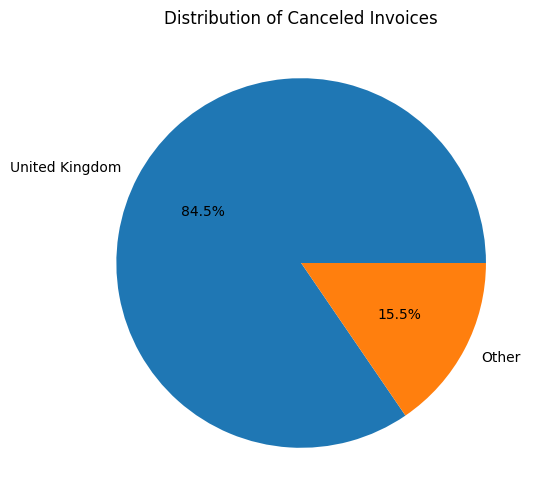

In [18]:
# Find the countries of the canceled invoces
# Count the occurrences of each country in the 'Country' column
country_counts = df_canceled_invoices['Country'].value_counts()

# Separate UK from other countries
uk_count = country_counts['United Kingdom']
other_countries_count = country_counts.drop('United Kingdom').sum()

# Create a new DataFrame with UK and Other
countries = ['United Kingdom', 'Other']
counts = [uk_count, other_countries_count]

# Plotting a pie chart for UK and Other countries
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=countries, autopct='%1.1f%%')
plt.title('Distribution of Canceled Invoices')
plt.show()

In [19]:
all_countries = df['Country'].unique()
canceled_countries = df_canceled_invoices['Country'].unique()

countries_without_canceled_invoices = [country for country in all_countries if country not in canceled_countries]
countries_without_canceled_invoices

['Lithuania',
 'Iceland',
 'Lebanon',
 'United Arab Emirates',
 'Canada',
 'Unspecified',
 'Brazil',
 'RSA']

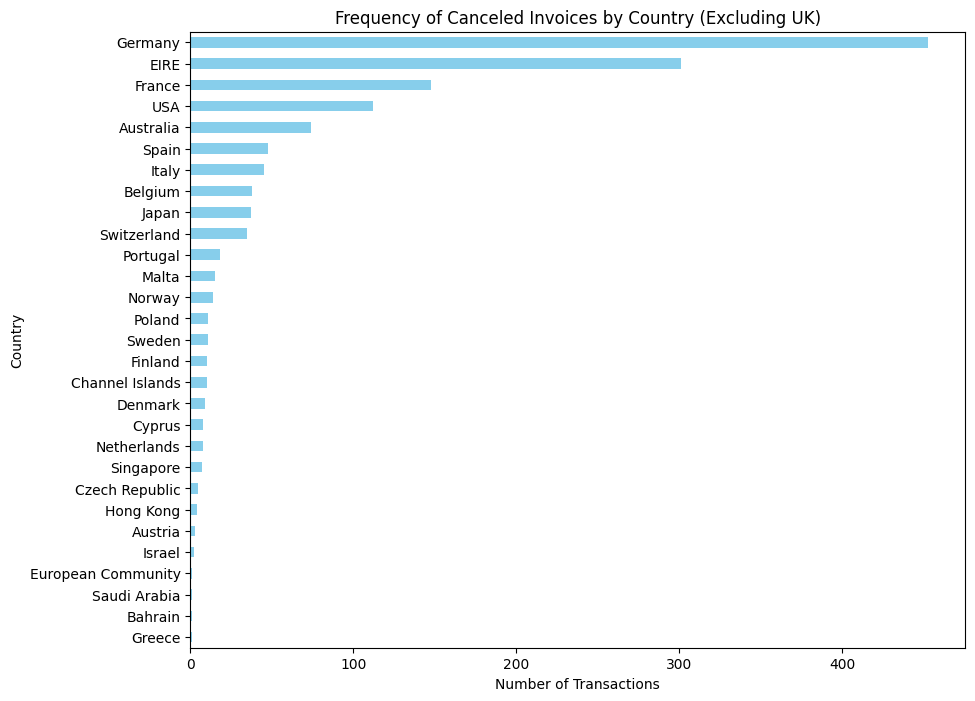

In [20]:
# Exclude 'United Kingdom' and count occurrences of each country
country_counts = df_canceled_invoices[df_canceled_invoices['Country'] != 'United Kingdom']['Country'].value_counts()

# Sort the values from the most to the least frequent
country_counts = country_counts.sort_values(ascending=True)

# Create a horizontal bar plot
country_counts.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Frequency of Canceled Invoices by Country (Excluding UK)')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

The analysis of canceled invoices highlights the top countries impacted by cancellations. The United Kingdom stands out with the most canceled transactions at 7821, significantly higher than other nations in the dataset. Germany, EIRE, France, and the USA follow as the subsequent countries affected by cancellations, with 453, 301, 148, and 112 instances, respectively. Notably, several countries, including Lithuania, Iceland, Lebanon, the United Arab Emirates, Canada, Unspecified, Brazil, and RSA, notably had no recorded canceled invoices within this dataset. This insight provides a clear understanding of the geographic distribution of the cancellation trend, emphasizing the need for a closer examination of the factors contributing to cancellation disparities across different regions.

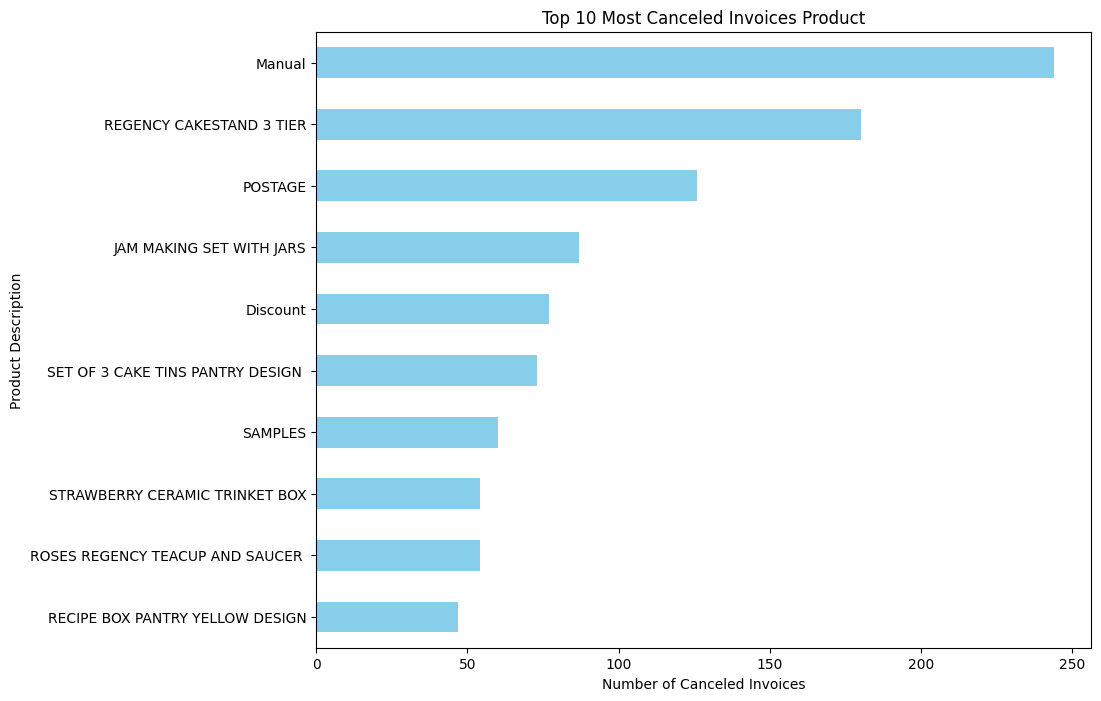

In [21]:
top_10_canceled_desc = df_canceled_invoices['Description'].value_counts().head(10)

top_10_canceled_desc = top_10_canceled_desc.sort_values(ascending=True)
top_10_canceled_desc.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Top 10 Most Canceled Invoices Product')
plt.xlabel('Number of Canceled Invoices')
plt.ylabel('Product Description')
plt.show()

The data reveals the top 10 descriptions associated with canceled invoices, indicating the most prevalent items subject to cancellations. Notably, "Manual" appears as the most frequently canceled item, occurring in 244 instances, followed by "REGENCY CAKESTAND 3 TIER" with 180 cancellations. "POSTAGE" and "JAM MAKING SET WITH JARS" stand out with 126 and 87 instances, respectively. Additionally, "Discount," "SET OF 3 CAKE TINS PANTRY DESIGN," "SAMPLES," "ROSES REGENCY TEACUP AND SAUCER," "STRAWBERRY CERAMIC TRINKET BOX," and "RECIPE BOX PANTRY YELLOW DESIGN" contribute significantly to the list of the most canceled products. This insight can guide businesses in understanding the types of items more susceptible to cancellation, prompting further investigation into the reasons behind these trends and the underlying causes of customer dissatisfaction or operational issues.

In [22]:
# Create dataframe of all non-canceled invoices
df_non_canceled_invoices = df[~df['InvoiceNo'].str.startswith('C')]
df_non_canceled_invoices.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,InvoiceYear
count,527390.000000,527390,527390.000000,392732.000000,527390.000000,527390.000000
mean,10.311272,2011-07-04 12:21:06.631866112,3.945839,15287.734822,7.549497,2010.921762
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000,1.000000,2010.000000
25%,1.000000,2011-03-28 11:49:00,1.250000,13955.000000,5.000000,2011.000000
50%,3.000000,2011-07-19 15:55:00,2.080000,15150.000000,8.000000,2011.000000
75%,11.000000,2011-10-19 10:56:00,4.130000,16791.000000,11.000000,2011.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,12.000000,2011.000000
std,160.367285,NaN,41.955953,1713.567773,3.508399,0.268546


In [23]:
df_non_canceled_invoices[df_non_canceled_invoices['Quantity'] < 0].nunique()

InvoiceNo       1336
StockCode       1082
Description      783
Quantity         298
InvoiceDate     1114
UnitPrice          1
CustomerID         0
Country            1
InvoiceMonth      12
InvoiceYear        2
dtype: int64

In [24]:
df_non_canceled_invoices[df_non_canceled_invoices['Quantity'] < 0]['UnitPrice'].unique()

array([0.])

In [25]:
df_non_canceled_invoices[df_non_canceled_invoices['Quantity'] < 0]['Country'].unique()

array(['United Kingdom'], dtype=object)

In reviewing the dataset, it was noted that out of 532,621 non-canceled invoices, 1336 invoices exhibited negative quantity values. These anomalies are observed within transactions specific to the United Kingdom and a unit price of 0 sterling. Further investigation is required to understand the source and nature of these transactions. Initial insights suggest potential anomalies within the data or underlying business operations.

The discrepancies in the dataset are observed within a subset of transactions originating from the United Kingdom and reflecting a unit price of 0 sterling. The occurrences of negative quantity values within non-canceled invoices warrant thorough investigation. It is essential to determine whether these entries are indicative of data errors, accounting for particular types of transactions such as samples, freebies, adjustments, or internal transfers.

Recommended Actions:
1. Data Verification: Validate the accuracy and integrity of these specific transactions to identify any potential data entry errors or anomalies within the dataset.
2. Business Context Analysis: Gain a comprehensive understanding of the operations and transactions specific to the UK market. Determine if zero-priced items signify particular business operations, such as samples, adjustments, or other non-standard transactions leading to negative quantities.
3. Collaboration and Consultation: Engage with the personnel directly involved in handling transactions within the UK. This includes discussing the specific entries with zero pricing to comprehend their nature, origin, and potential impact on the dataset.

## Country Distribution

In [26]:
# The number of unique country
print('Total unique country:', df['Country'].nunique())

Total unique country: 38


In [27]:
# Total invoices from all listed country
df['Country'].value_counts()

Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


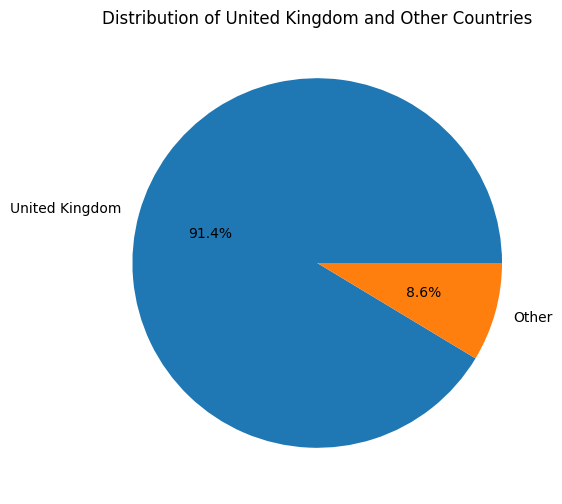

In [28]:
# Count the occurrences of each country in the 'Country' column
country_counts = df['Country'].value_counts()

# Separate UK from other countries
uk_count = country_counts['United Kingdom']
other_countries_count = country_counts.drop('United Kingdom').sum()

# Create a new DataFrame with UK and Other
countries = ['United Kingdom', 'Other']
counts = [uk_count, other_countries_count]

# Plotting a pie chart for UK and Other countries
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=countries, autopct='%1.1f%%')
plt.title('Distribution of United Kingdom and Other Countries')
plt.show()

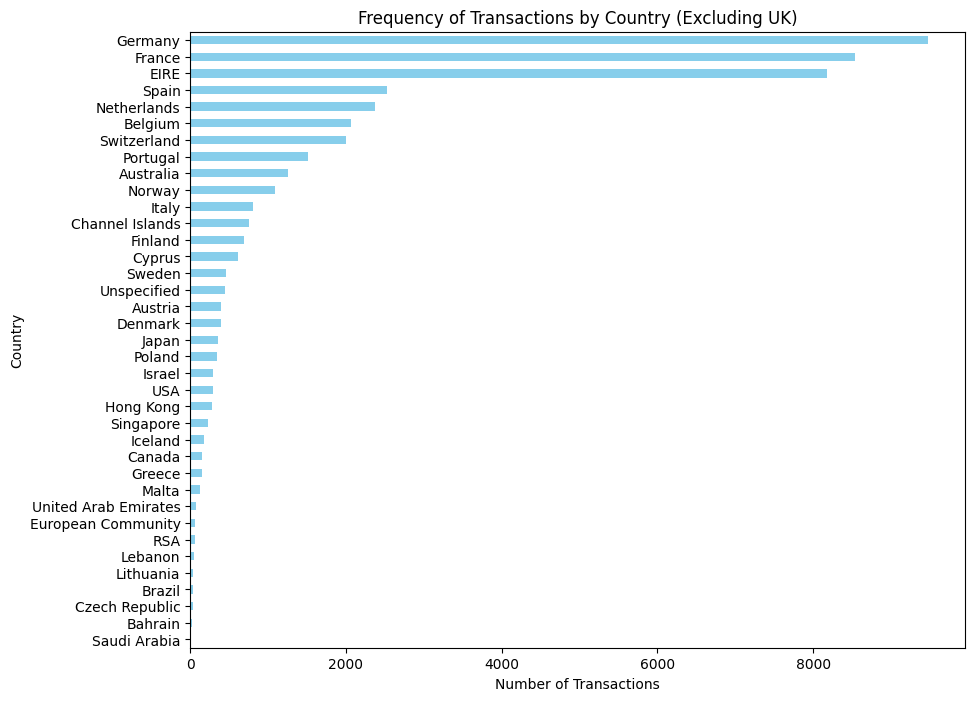

In [29]:
# Exclude 'United Kingdom' and count occurrences of each country
country_counts = df[df['Country'] != 'United Kingdom']['Country'].value_counts()

# Sort the values from the most to the least frequent
country_counts = country_counts.sort_values(ascending=True)

# Create a horizontal bar plot
country_counts.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Frequency of Transactions by Country (Excluding UK)')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

The data provides a clear distribution of sales across various countries, with the United Kingdom representing the primary market, accounting for 490,300 transactions (91.4%). Germany and France follow, with 9,480 (1.8%) and 8,541 (1.6%) transactions, respectively. It’s evident that a significant portion of sales is concentrated in a few key countries, with others having notably fewer transactions. This distribution insight can be crucial for strategic decision-making, indicating the primary market and potential areas for business expansion or targeted marketing efforts.

The report underscores the dominance of the United Kingdom in sales, highlighting its substantial lead compared to other countries. Moreover, the prevalence of sales in a select few countries and the relatively low transaction volumes in other regions can prompt businesses to consider diversification strategies or concentrate efforts where the market is most active. Understanding the unique market dynamics within each country can aid in tailoring marketing strategies, product offerings, and customer service to better resonate with diverse customer segments across various regions, ultimately optimizing sales and customer satisfaction.

## Invoice Traffic

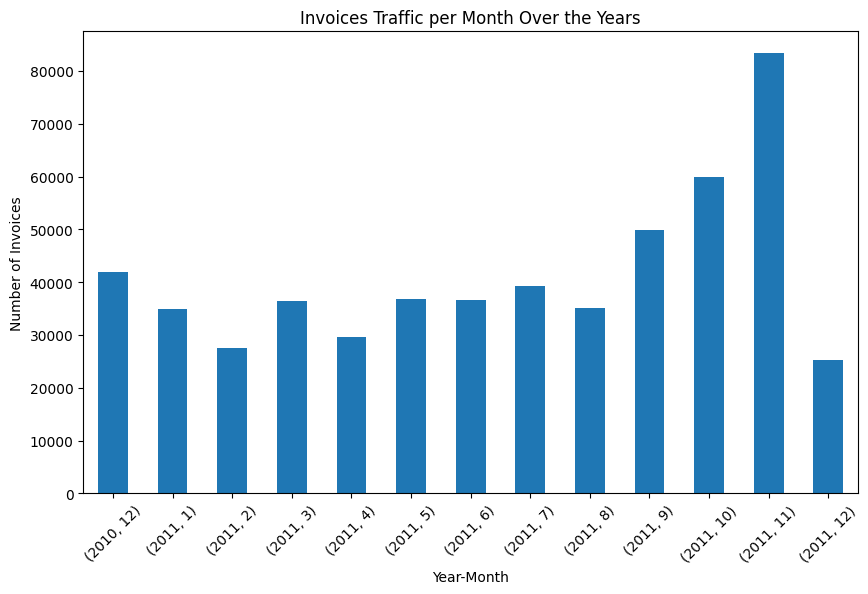

In [30]:
# Plotting the traffic of invoices per month over the years
plt.figure(figsize=(10, 6))
df.groupby(['InvoiceYear', 'InvoiceMonth']).size().plot(kind='bar')
plt.title('Invoices Traffic per Month Over the Years')
plt.xlabel('Year-Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.show()

The graph, displaying the monthly distribution of invoices between December 2010 and December 2011, showcases an overall ascending trend. Notably, the culmination occurs in November 2011, marking the peak of invoice generation within this timeframe. However, a substantial decline is observed in the subsequent month, which could potentially indicate a significant drop in sales or transactions. The sudden decrease in December 2011 following the peak in November may signify a considerable shift in business activity, possibly influenced by seasonal trends, market factors, internal operational changes during this period, or because the dataset's cutoff date, reaching the endpoint of the available information.

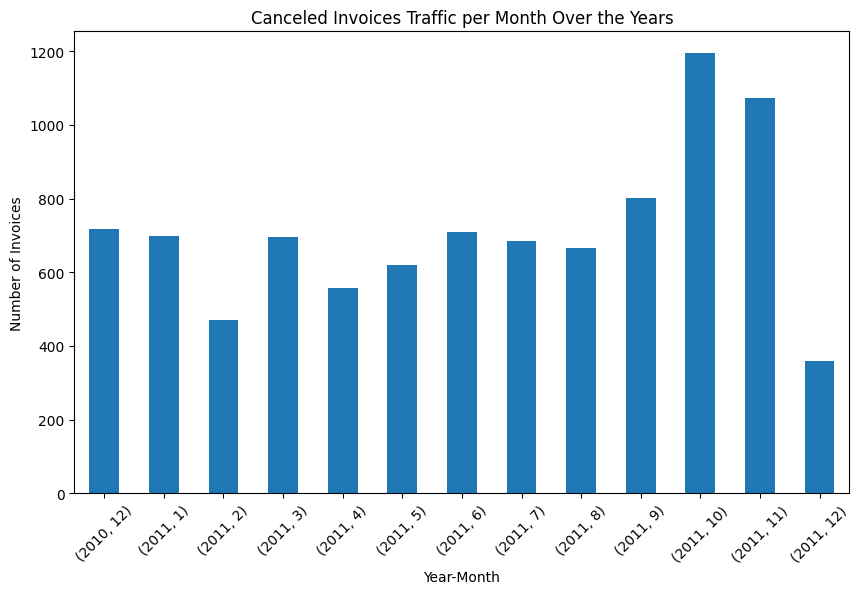

In [31]:
# Plotting the traffic of invoices per month over the years
plt.figure(figsize=(10, 6))
df_canceled_invoices.groupby(['InvoiceYear', 'InvoiceMonth']).size().plot(kind='bar')
plt.title('Canceled Invoices Traffic per Month Over the Years')
plt.xlabel('Year-Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.show()

The graph shows the ebb and flow of canceled invoices throughout the dataset's timeline. Until September 2011, the number of canceled invoices remained consistently below 800. The following month, however, there was a sharp spike, with cancellations nearly doubling, indicating a significant anomaly. November 2011 shows a slight decline from the peak. Most intriguing is the significant drop below 400 in December 2011, indicating a rapid decline. Further research into why this sudden spike occurred in October 2011 and the subsequent rapid decline in the last month is recommended. Understanding the reasons behind these abrupt fluctuations is crucial to deciphering any underlying trends or potential anomalies.

## Unit Price Distribution

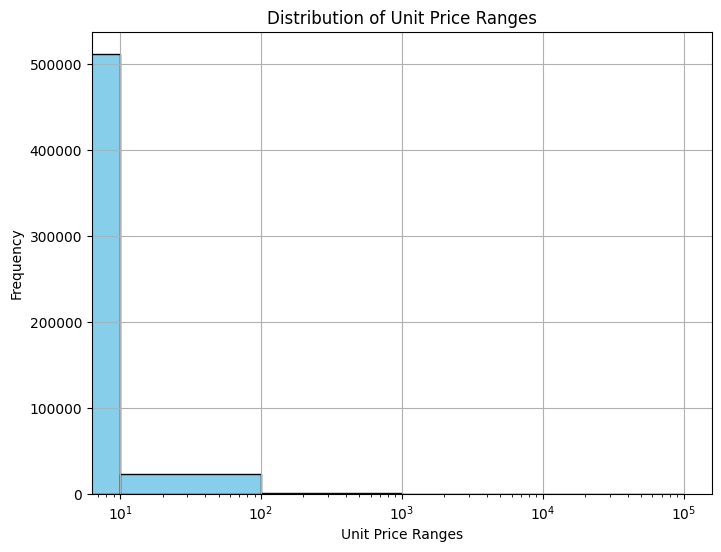

In [32]:
# Define the bins for grouping the unit prices
bins = [0, 10, 100, 1000, 10000, 100000]

# Plotting a histogram with grouped unit prices
plt.figure(figsize=(8, 6))
plt.hist(df['UnitPrice'], bins=bins, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Unit Price Ranges')
plt.xlabel('Unit Price Ranges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
# Define the bins for grouping the unit prices
bins = [0, 10, 100, 1000, 10000, 100000]

# Get the frequency counts for each bin
frequency, _ = np.histogram(df['UnitPrice'], bins=bins)

# Display the frequency count for each bin
for i, freq in enumerate(frequency):
    print(f"Unit price {bins[i]} - {bins[i+1]} sterling: {freq}")

Unit price 0 - 10 sterling: 511666
Unit price 10 - 100 sterling: 23936
Unit price 100 - 1000 sterling: 917
Unit price 1000 - 10000 sterling: 110
Unit price 10000 - 100000 sterling: 12


The analysis shows a significant concentration of transactions in the range of 0 to 10 sterling, representing a significant proportion with 511,666 occurrences. Moving to higher price levels, the frequency of transactions decreases significantly, with only 23936 transactions in the 10 to 100 sterling range, 917 transactions in the 100 to 1000 sterling range, followed by a notable decline to 110 transactions in the 1000 to 10000 sterling range. The top range, 10000 to 100000 sterling, has a minimum of 12 transactions. This distribution underscores the prevalence of transactions with lower unit prices, while the frequency decreases significantly as the price range increases, representing a pattern in which larger prices are less common within the dataset.

## Countries Without Canceled Invoices

In [34]:
# Filtering the main DataFrame for entries matching countries without canceled invoices
df_countries_without_canceled = df[df['Country'].isin(countries_without_canceled_invoices)]
df_countries_without_canceled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear
7872,537081,22409,MONEY BOX BISCUITS DESIGN,12,2010-12-05 12:00:00,1.25,15332.0,Lithuania,12,2010
7873,537081,21915,RED HARMONICA IN BOX,36,2010-12-05 12:00:00,1.25,15332.0,Lithuania,12,2010
7874,537081,15056BL,EDWARDIAN PARASOL BLACK,12,2010-12-05 12:00:00,5.95,15332.0,Lithuania,12,2010
7875,537081,15056N,EDWARDIAN PARASOL NATURAL,12,2010-12-05 12:00:00,5.95,15332.0,Lithuania,12,2010
7876,537081,20679,EDWARDIAN PARASOL RED,12,2010-12-05 12:00:00,5.95,15332.0,Lithuania,12,2010
...,...,...,...,...,...,...,...,...,...,...
529783,581180,20719,WOODLAND CHARLOTTE BAG,10,2011-12-07 15:52:00,0.85,12347.0,Iceland,12,2011
529784,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347.0,Iceland,12,2011
529785,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,2011-12-07 15:52:00,0.83,12347.0,Iceland,12,2011
529786,581180,23506,MINI PLAYING CARDS SPACEBOY,20,2011-12-07 15:52:00,0.42,12347.0,Iceland,12,2011


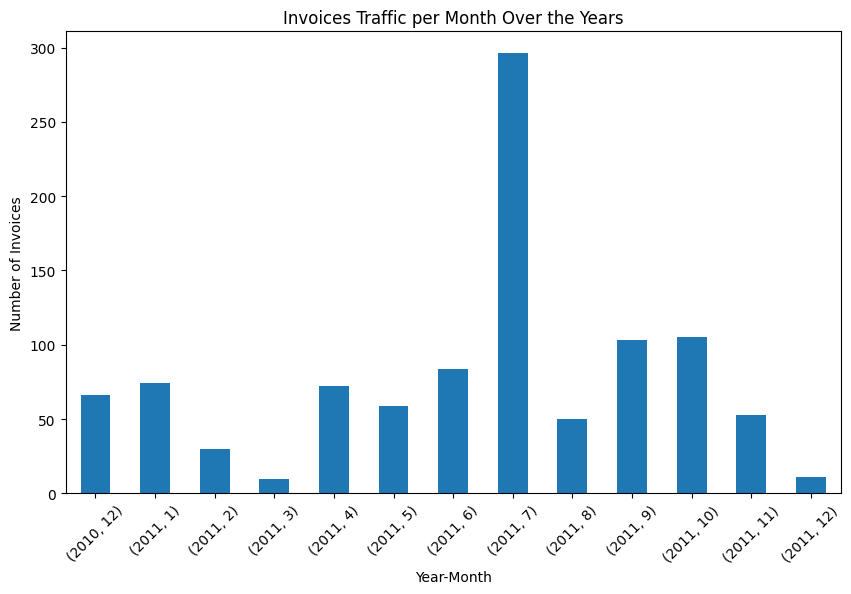

In [35]:
# Plotting the traffic of invoices per month over the years
plt.figure(figsize=(10, 6))
df_countries_without_canceled.groupby(['InvoiceYear', 'InvoiceMonth']).size().plot(kind='bar')
plt.title('Invoices Traffic per Month Over the Years')
plt.xlabel('Year-Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.show()

The plot of invoice traffic per month over the years for countries with no canceled invoices shows interesting patterns. In particular, at (2011, 7), there's a significant spike in invoice traffic, reaching almost 300 invoices for that particular month. In contrast, the remaining months show significantly lower volumes, averaging around 100 invoices or even less. Months (2011, 2), (2011, 3), and (2011, 12) appear to have particularly low activity, with less than 50 invoices per month. This data indicates a significant spike in business around July 2011, while the remaining months show lower invoice counts, with February, March, and December 2011 being particularly quiet periods.

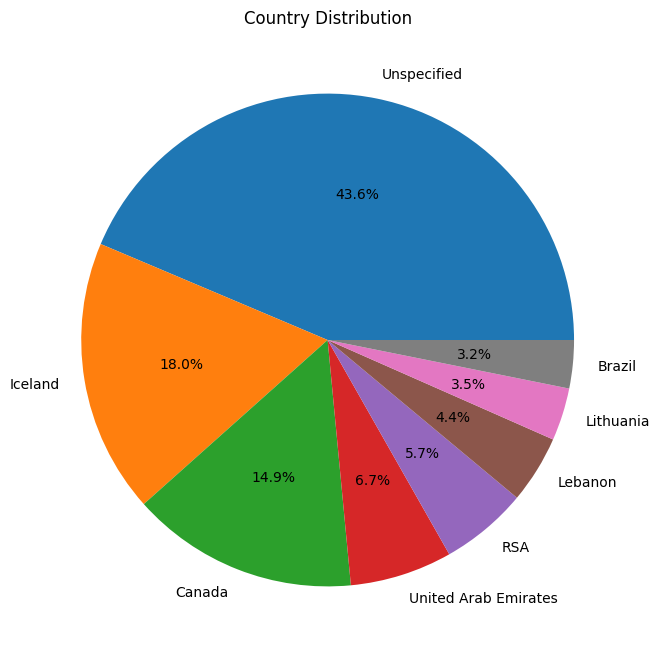

In [36]:
# Count the occurrences of each country in the DataFrame
country_counts = df_countries_without_canceled['Country'].value_counts()

# Plotting the pie chart for country distribution
plt.figure(figsize=(10, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Country Distribution')
plt.ylabel('')  # Remove the label for the y-axis
plt.show()

The pie chart showing the country distribution in the dataset, specifically for countries without canceled invoices, shows a clear predominance of "Unspecified" with 43.6%. This is followed by "Iceland" with 18.0% and "Canada" with 14.9%. This is followed by "United Arab Emirates" with 6.7%, "RSA" with 5.7% and "Lebanon" with 4.4%. Less represented are "Lithuania" and "Brazil" with 3.5% and 3.2% respectively. This data provides insight into the prominence of "Unspecified" and "Iceland" as the most common contributors among the countries without canceled invoices in the dataset.

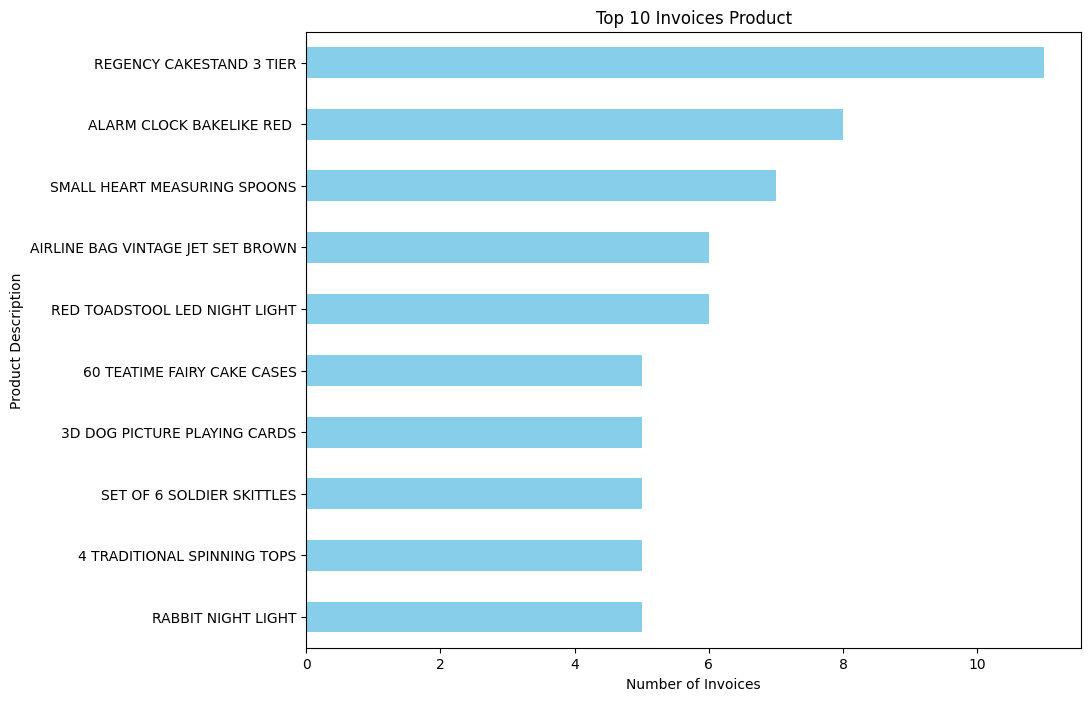

In [37]:
top_10_product = df_countries_without_canceled['Description'].value_counts().head(10)

top_10_product = top_10_product.sort_values(ascending=True)
top_10_product.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Top 10 Invoices Product')
plt.xlabel('Number of Invoices')
plt.ylabel('Product Description')
plt.show()

The top 10 most ordered product descriptions in the countries without canceled invoices dataset reveal several popular items. At the top of the list is "REGENCY CAKESTAND 3 TIER" with 11 occurrences, indicating its popularity among customers. Close on its heels is "ALARM CLOCK BAKELIKE RED" with a substantial 8 occurrences, indicating its appeal as a preferred choice. Other items in the top 10, such as "SMALL HEART MEASURING SPOON", "RED TOADSTOOL LED NIGHT LIGHT" and "AIRLINE BAG VINTAGE JET SET BROWN", each with 6 or 7 counts, show consistent demand. The prevalence of these specific items suggests a customer preference for these products within the countries without canceled invoices in the data set.

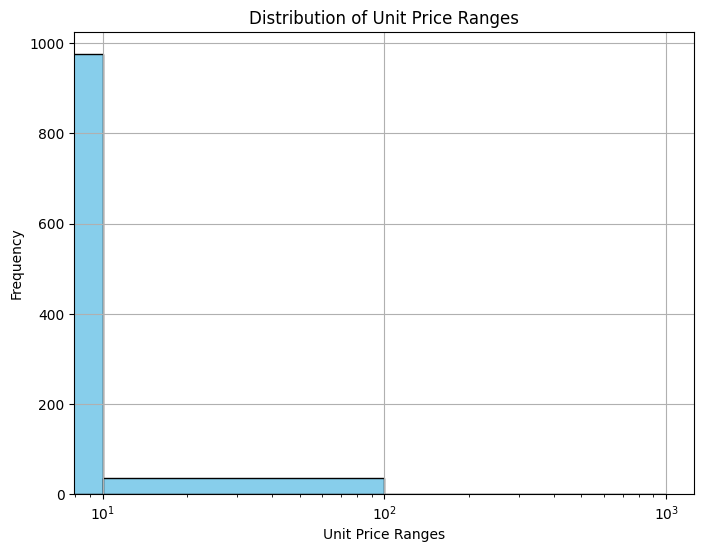

In [38]:
# Define the bins for grouping the unit prices
bins = [0, 10, 100, 1000]

# Plotting a histogram with grouped unit prices
plt.figure(figsize=(8, 6))
plt.hist(df_countries_without_canceled['UnitPrice'], bins=bins, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Unit Price Ranges')
plt.xlabel('Unit Price Ranges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
# Define the bins for grouping the unit prices
bins = [0, 10, 100, 1000]

# Get the frequency counts for each bin
frequency, _ = np.histogram(df_countries_without_canceled['UnitPrice'], bins=bins)

# Display the frequency count for each bin
for i, freq in enumerate(frequency):
    print(f"Unit price {bins[i]} - {bins[i+1]} sterling: {freq}")

Unit price 0 - 10 sterling: 976
Unit price 10 - 100 sterling: 36
Unit price 100 - 1000 sterling: 1


The unit price segmentation into predefined bins for countries with no canceled invoices provides interesting insights. The majority of transactions, 976 to be exact, fall within the price range of 0 to 10 sterling, indicating a prevalent pattern of lower-priced items being favored in these countries. However, the number drops dramatically for higher priced items, with only 36 transactions recorded between 10 and 100 sterling, and only 1 transaction observed in the 100 to 1000 sterling range. This data shows a clear preference for lower-priced items among shoppers in these regions, demonstrating a stronger inclination towards more affordable goods or a different pricing strategy within this particular market segment.